In [2]:
#Recomended to install a beta version of ASE that has better onetep support and will be implemnted in the main ASE package soon
# pip install --force-reinstall --no-deps git+https://gitlab.com/tomdemeyere/ase.git@onetep
#This is the recomended way to generate the bcc Li slab however the outputs discussed in the tutorial are generated from the hashed out code below
from ase.io.onetep import get_onetep_keywords
from ase.build.surface import bcc100 
from ase.lattice.surface import surface
from ase.visualize import view
from ase.build import bulk
from ase.io import write

#not recomended to use this method as it is not as robust as the bcc100 method but was used to generate the outputs in the tutorial
# Li_bulk = bulk('Li', 'bcc', a=3.466, cubic=True)
# Li_surface = surface(Li_bulk, (1, 0, 0), 10, vacuum=25)
# Li_surface = Li_surface.repeat((3, 3, 1))
# write(Filename, Li_surface, format='onetep-in', keywords=keywords)

# Create a 3x3x10 bcc Li slab with 25 Angstrom vacuum (Recommended)
Li_surface = bcc100('Li', (3, 3, 10), a = 3.466, vacuum=25)
Li_surface.set_tags([0]*len(Li_surface))
#write a onetep input file with the provied keywords
Filename = 'Li_surface.dat'
keywords = get_onetep_keywords('tutorial_11/keywords.dat') # path to keywords.dat - specify your own path
write(Filename, Li_surface, format='onetep-in', keywords=keywords)
#visualise the slab within the notebook
view(Li_surface, viewer='x3d')



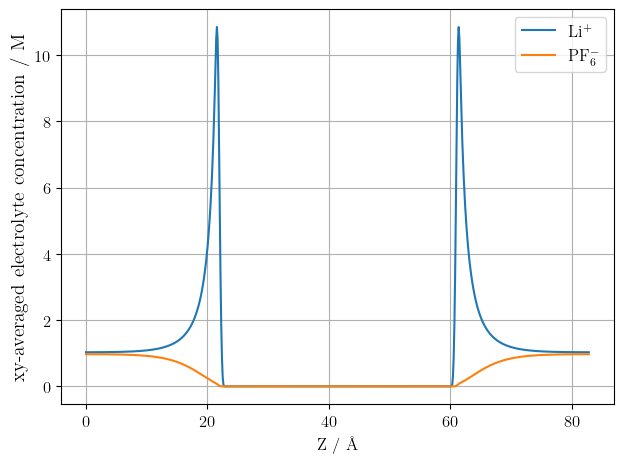

In [2]:
# Averaged xy-plane of concentration profiles:
# pip install gridDataFormats numpy matplotlib 
import numpy as np
import matplotlib.pyplot as plt
from gridData import Grid
from matplotlib import rc
# Set up LaTeX style
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 12})
rc('text', usetex=True)
# Load data and average over xy-plane
Li_conc_data  = Grid("Li_out_bion_conc_species_1.dx")
pf6_conc_data = Grid("Li_out_bion_conc_species_2.dx")
av_li_conc  = np.mean(Li_conc_data.grid, axis=(0, 1))
av_pf6_conc = np.mean(pf6_conc_data.grid, axis=(0, 1))
z_axis = np.arange(Li_conc_data.grid.shape[2]) * Li_conc_data.delta[2]  
# Plot averaged concentration profiles
plt.xlabel('Z / \AA')  
plt.ylabel('xy-averaged electrolyte concentration / M', fontsize=14) 
plt.plot(z_axis, av_li_conc, label=r'Li$^{+}$') 
plt.plot(z_axis, av_pf6_conc, label=r'PF$_6^{-}$') 
plt.grid() 
plt.legend()  
plt.tight_layout()
plt.savefig("average_concentration_plot.png", dpi=1500)
plt.show()

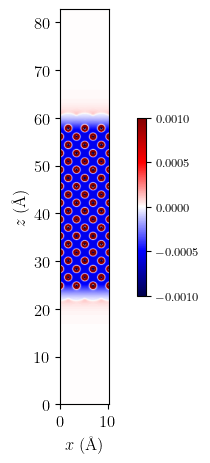

In [11]:
#import libraries
from gridData import Grid
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Read the total.dx file (Electronic + Nuclear + Electrolyte density)
total_density = Grid("total.dx")

# Grid details
gx = total_density.grid.shape[0]
gy = total_density.grid.shape[1]
gz = total_density.grid.shape[2]
dx = total_density.delta[0]
dz = total_density.delta[2]
x = np.arange(gx)
z = np.arange(gz)
ax, az = np.meshgrid(x, z)
lx = dx * ax
lz = dz * az

cmap = plt.cm.seismic
norm = plt.Normalize(vmin=-0.001, vmax=0.001)
total_density_slice = -np.sum(total_density.grid, axis=1) / (gx * gy)
plt.pcolormesh(lx, lz, total_density_slice.T, shading='gouraud', cmap=cmap, norm=norm)
#colorbar settings
colorbar = plt.colorbar(shrink=0.45)
colorbar.ax.tick_params(labelsize=8.5)
colorbar.locator = MaxNLocator(nbins=4)
#Plotting 
plt.xlabel(r'$x$ ($\rm \AA$)')
plt.ylabel(r'$z$ ($\rm \AA$)')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("density_slice.png", dpi=2000, transparent=True)
plt.show()
